In [1]:
from imldiff.comparers import DifferenceComparer
from imldiff.model import Model
from imldiff.plots import plot_decision_boundaries
from imldiff.util import printmd
import shap
from shap.maskers import Independent
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
feature_names = ['x1', 'x2']

In [3]:
class Discriminator(Model):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([1.0 if x[0] < 0.0 else 0.0 for x in X])

class MovedDecisionBoundaryDiscriminator(Model):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([1.0 if x[0] < 0.1 else 0.0 for x in X])

In [4]:
number_of_samples = 1000
X = np.random.uniform(-1, 1, (number_of_samples, 2))
discriminator = Discriminator()
moved_decision_boundary_discriminator = MovedDecisionBoundaryDiscriminator()
models = [discriminator, moved_decision_boundary_discriminator]

In [5]:
predictions_slim_step = discriminator.predict_proba(X)

In [6]:
predictions_wide_step = moved_decision_boundary_discriminator.predict_proba(X)

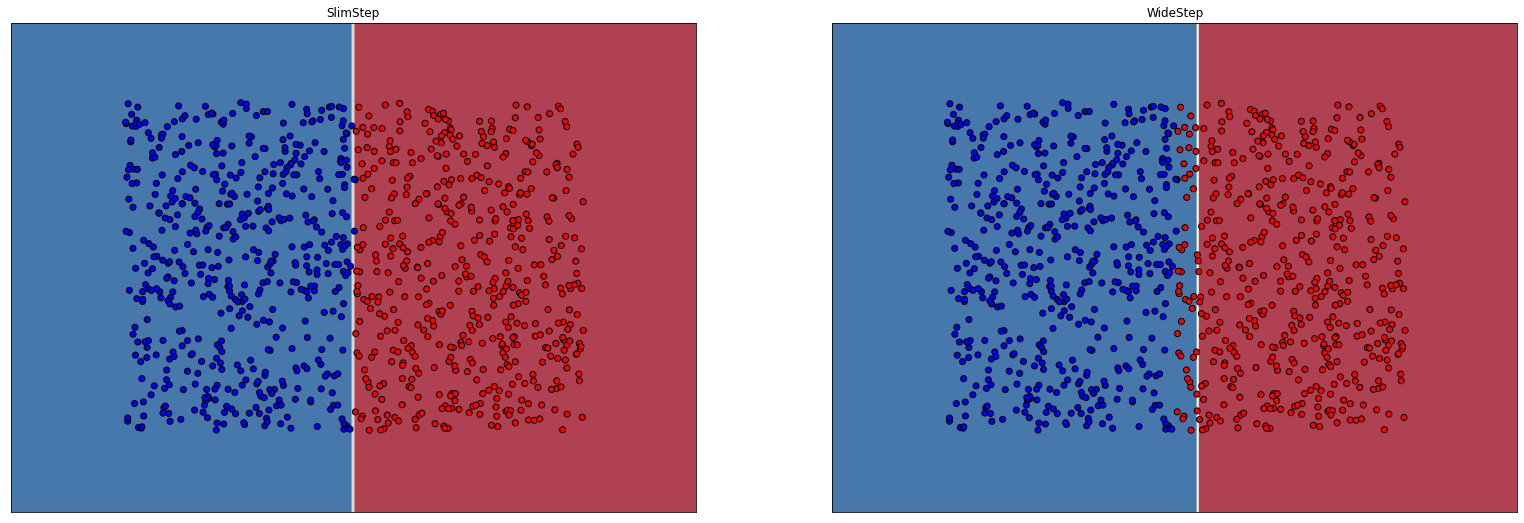

In [7]:
plot_decision_boundaries(models, X, predictions_slim_step)

In [8]:
comparer = DifferenceComparer(discriminator, moved_decision_boundary_discriminator)

In [9]:
masker = Independent(X, max_samples=1000)
explainer = shap.Explainer(comparer.predict_proba, masker, feature_names=feature_names)
shap_values = explainer(X)

Exact explainer: 1001it [00:11, 19.68it/s]                          


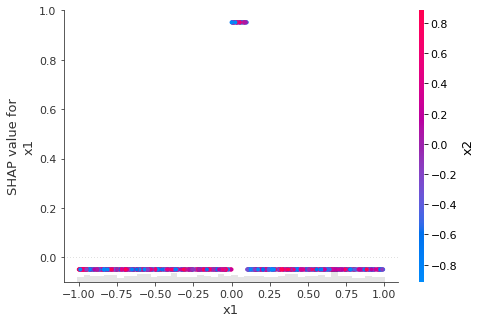

In [10]:
shap.plots.scatter(shap_values[:, 'x1'], color=shap_values)

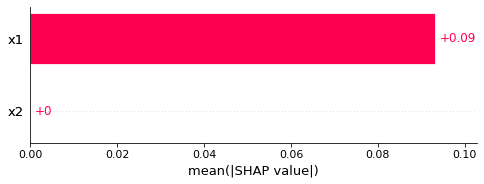

In [11]:
shap.plots.bar(shap_values)

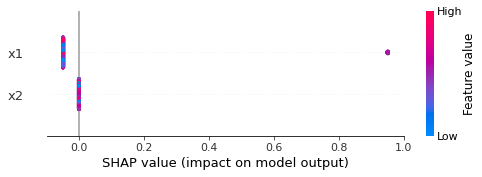

In [12]:
shap.plots.beeswarm(shap_values)

In [13]:
shap.initjs()
shap.plots.force(
    base_value=shap_values.abs.mean(0).base_values,
    shap_values=shap_values.values,
    features=shap_values.display_data,
    feature_names=feature_names)

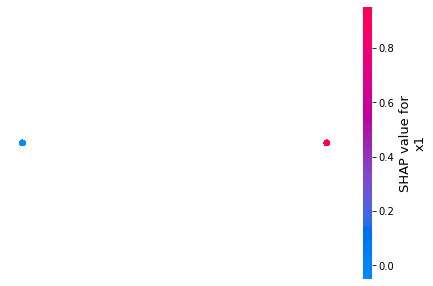

In [14]:
shap.plots.embedding('x1', shap_values.values, feature_names=feature_names)

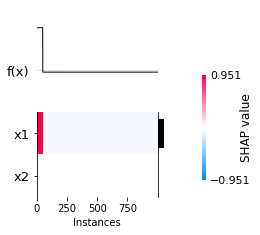

In [15]:
shap.plots.heatmap(shap_values, max_display=len(feature_names))